In [1]:
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline 

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('ML_Input_Model_Train.csv', delimiter=';')
df.tail()

,status,shortlong,forceIndex,trend2min,trend5min,trend10min,trend15min,difCand5,buildDate,difOpenClose,dojy,hammer,breakout,highGulf,lowGulf
4570,GAIN,COMPRADO,100,90,130,120,65,100,1573673099000,110,False,False,False,False,False
4571,GAIN,COMPRADO,140,-50,100,155,255,140,1573673399000,-50,False,False,False,False,False
4572,LOSS,COMPRADO,140,165,220,100,120,140,1573673699000,185,False,False,False,False,False
4573,LOSS,COMPRADO,80,20,75,80,125,80,1573674299000,50,False,False,False,False,False
4574,GAIN,COMPRADO,95,15,30,80,30,95,1573675499000,10,False,False,False,False,False


In [3]:
print(len(df['status'].unique()))
print(len(df['shortlong'].unique()))
print(len(df['buildDate'].unique()))

4
2
4575


In [4]:
df.drop('buildDate', axis=1, inplace=True)
df.tail()

,status,shortlong,forceIndex,trend2min,trend5min,trend10min,trend15min,difCand5,difOpenClose,dojy,hammer,breakout,highGulf,lowGulf
4570,GAIN,COMPRADO,100,90,130,120,65,100,110,False,False,False,False,False
4571,GAIN,COMPRADO,140,-50,100,155,255,140,-50,False,False,False,False,False
4572,LOSS,COMPRADO,140,165,220,100,120,140,185,False,False,False,False,False
4573,LOSS,COMPRADO,80,20,75,80,125,80,50,False,False,False,False,False
4574,GAIN,COMPRADO,95,15,30,80,30,95,10,False,False,False,False,False


In [5]:
df.columns

Index(['status', 'shortlong', 'forceIndex', 'trend2min', 'trend5min',
       'trend10min', 'trend15min', 'difCand5', 'difOpenClose', 'dojy',
       'hammer', 'breakout', 'highGulf', 'lowGulf'],
      dtype='object')

In [6]:
df['dojy'] = df['dojy'].astype('int')
df['hammer'] = df['hammer'].astype('int')
df['breakout'] = df['breakout'].astype('int') 
df['highGulf'] = df['highGulf'].astype('int') 
df['lowGulf'] = df['lowGulf'].astype('int')

In [7]:
df.tail()

,status,shortlong,forceIndex,trend2min,trend5min,trend10min,trend15min,difCand5,difOpenClose,dojy,hammer,breakout,highGulf,lowGulf
4570,GAIN,COMPRADO,100,90,130,120,65,100,110,0,0,0,0,0
4571,GAIN,COMPRADO,140,-50,100,155,255,140,-50,0,0,0,0,0
4572,LOSS,COMPRADO,140,165,220,100,120,140,185,0,0,0,0,0
4573,LOSS,COMPRADO,80,20,75,80,125,80,50,0,0,0,0,0
4574,GAIN,COMPRADO,95,15,30,80,30,95,10,0,0,0,0,0


In [8]:
print(df['status'].unique())
print(df['shortlong'].unique())

['GAIN' 'LOSS' 'COMPRADO' 'VENDIDO']
['VENDIDO' 'COMPRADO']


In [9]:
df.drop(df[df['status'] == 'COMPRADO'].index, inplace=True)
df.drop(df[df['status'] == 'VENDIDO'].index, inplace=True)

df['status'].replace(to_replace='GAIN', value=1, inplace=True)
df['status'].replace(to_replace='LOSS', value=0, inplace=True)

df['shortlong'].replace(to_replace='COMPRADO', value=1, inplace=True)
df['shortlong'].replace(to_replace='VENDIDO', value=0, inplace=True)

In [10]:
df.tail()

,status,shortlong,forceIndex,trend2min,trend5min,trend10min,trend15min,difCand5,difOpenClose,dojy,hammer,breakout,highGulf,lowGulf
4570,1,1,100,90,130,120,65,100,110,0,0,0,0,0
4571,1,1,140,-50,100,155,255,140,-50,0,0,0,0,0
4572,0,1,140,165,220,100,120,140,185,0,0,0,0,0
4573,0,1,80,20,75,80,125,80,50,0,0,0,0,0
4574,1,1,95,15,30,80,30,95,10,0,0,0,0,0


In [11]:
X = df.drop('status', axis=1).values
y = df['status'].values

In [12]:
print(f'Data:\n\n{X[-5:]}\nLabels:\n\n{y[-5:]}')

Data:

[[  1 100  90 130 120  65 100 110   0   0   0   0   0]
 [  1 140 -50 100 155 255 140 -50   0   0   0   0   0]
 [  1 140 165 220 100 120 140 185   0   0   0   0   0]
 [  1  80  20  75  80 125  80  50   0   0   0   0   0]
 [  1  95  15  30  80  30  95  10   0   0   0   0   0]]
Labels:

[1 1 0 0 1]


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, plot_importance
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [14]:
X = StandardScaler().fit_transform(X)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25)

In [16]:
names = [
    "SVM-LINEAR", "SVM-RBF", "Gaussian Process", "Random Forest",
    "AdaBoost", "Decision Tree", 'XGB'
]

classifiers = [
    LogisticRegression(),
    SVC(kernel="linear"),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    XGBClassifier()
]

# iterate over classifiers
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print(f'{name}: {score}')

SVM-LINEAR: 0.7537248028045574
SVM-RBF: 0.7537248028045574
Gaussian Process: 0.7537248028045574
Random Forest: 0.6108676599474145
AdaBoost: 0.7388255915863278
Decision Tree: 0.7519719544259421
XGB: 0.7528483786152498


In [17]:
xgb_model = XGBClassifier()

# # Tunning parameters
# silent=False,
# scale_pos_weight=1,
# learning_rate=0.09,
# colsample_bytree = 0.4,
# subsample = 0.8,
# objective='binary:logistic',
# n_estimators=1000, 
# reg_alpha = 0.3,
# max_depth=5, 
# gamma=10

In [18]:
df.columns

Index(['status', 'shortlong', 'forceIndex', 'trend2min', 'trend5min',
       'trend10min', 'trend15min', 'difCand5', 'difOpenClose', 'dojy',
       'hammer', 'breakout', 'highGulf', 'lowGulf'],
      dtype='object')

In [19]:
eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ['auc', 'error']

%time xgb_model.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=0)

CPU times: user 464 ms, sys: 6.51 ms, total: 471 ms
Wall time: 482 ms


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [20]:
xgb_model.score(X_test, y_test)

0.7528483786152498

In [21]:
xgb_model.get_booster().feature_names = ['shortlong', 'forceIndex', 'trend2min', 'trend5min',
       'trend10min', 'trend15min', 'difCand5', 'difOpenClose', 'dojy',
       'hammer', 'breakout', 'highGulf', 'lowGulf']

<Figure size 1080x504 with 0 Axes>

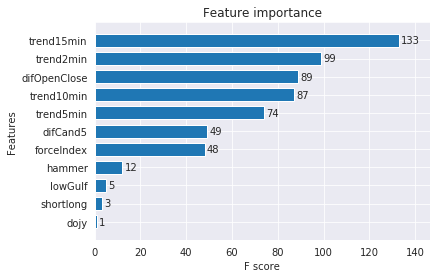

In [22]:
plt.figure(figsize=(15, 7))
plot_importance(xgb_model, height=0.72)
plt.show()

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from sklearn import metrics
from keras import optimizers

Using TensorFlow backend.


In [24]:
batch_size = 128
num_classes = 2
epochs = 100

x_train = X_train.reshape(X_train.shape[0], 13)
x_test = X_test.reshape(X_test.shape[0], 13)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print(f'{x_train.shape[0]} train samples with shape {x_train.shape}')
print(f'{x_test.shape[0]} test samples with shape {x_test.shape}')

# convert class vectors to binary class matrices
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

3423 train samples with shape (3423, 13)
1141 test samples with shape (1141, 13)


In [25]:
try:
    if model:
        del model
except NameError:
    pass

model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(13,)))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.nadam(),
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                700       
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               5100      
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 202       
Total params: 6,002
Trainable params: 6,002
Non-trainable params: 0
_________________________________________________________________


In [26]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=45,
                    verbose=0,
                    validation_data=(x_test, y_test))

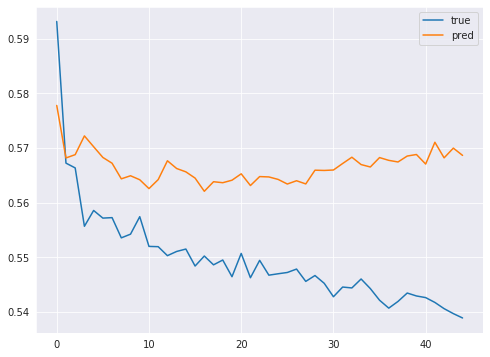

In [27]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='true')
plt.plot(history.history['val_loss'], label='pred')
plt.legend(loc='best')
plt.show()

In [28]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5686250128420062
Test accuracy: 0.749342679977417


In [29]:
metrics.accuracy_score(y_pred=model.predict_classes(x_test),
                       y_true=np.argmax(y_test, axis=1))

0.7493426818580193

In [30]:
model.save('MLP_0.77ACC_NADAM_45EPO_CATCROSS_2L_50_DROP0.2_100_DROP0.2_SOFTMAX.h5')